In [4]:
import pandas as pd
from pandas.core.computation.check import NUMEXPR_INSTALLED
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

## Use multiple imputation method, MICE in Python (random forest) ##
## https://towardsdatascience.com/multiple-imputation-with-random-forests-in-python-dec83c0ac55b
## Use function to change entire csv to upper case to ensure consistency (can be done at the end)

In [70]:
## Glucose
## https://diabetes.org/living-with-diabetes/treatment-care/hypoglycemia
## Looking at above link (and other sources), appears that mg/dL is the standard/most common

glucose_file = "/home/ec2-user/SageMaker/TEAM-5/Data Processing/TN_01/GlucResult.csv"
gluc = pd.read_csv(glucose_file)

print("-----------------------------------------------------------")
print("D1FastingPlasmaGlucUnits1_1 unique units:", gluc['D1FastingPlasmaGlucUnits1_1'].unique())
print("D1FastingPlasmaGlucUnits2_1 unique units:", gluc['D1FastingPlasmaGlucUnits2_1'].unique())
print("D1FastingPlasmaGlucUnits3_1 unique units:", gluc['D1FastingPlasmaGlucUnits3_1'].unique())
print("D3RandomPlasmaGlucUnits2_1 unique units:", gluc['D3RandomPlasmaGlucUnits2_1'].unique())
print("D3RandomPlasmaGlucUnits3_1 unique units:", gluc['D3RandomPlasmaGlucUnits3_1'].unique())
print("D3RandomPlasmaGlucUnits4_1 unique units:", gluc['D3RandomPlasmaGlucUnits4_1'].unique())
print("D3RandomPlasmaGlucUnits5_1 unique units:", gluc['D3RandomPlasmaGlucUnits5_1'].unique())
print("D2aOGTTFastingGlucUnits1_1 unique units:", gluc['D2aOGTTFastingGlucUnits1_1'].unique())
print("D2aOGTTFastingGlucUnits2_1 unique units:", gluc['D2aOGTTFastingGlucUnits2_1'].unique())
print("D2b2HourGlucUnits2_1 unique units:", gluc['D2b2HourGlucUnits2_1'].unique())
print("D2b2HourGlucUnits1_1 unique units:", gluc['D2b2HourGlucUnits1_1'].unique())

print("-----------------------------------------------------------")
print(gluc.describe())
print("-----------------------------------------------------------")
for col in gluc.columns:
    print(col)
print("-----------------------------------------------------------")

gluc['D1FastingPlasmaGlucResult_Units1'] = gluc['D1FastingPlasmaGlucResult1_1'].astype(str) + gluc['D1FastingPlasmaGlucUnits1_1'].astype(str)
gluc['D1FastingPlasmaGlucResult_Units2'] = gluc['D1FastingPlasmaGlucResult2_1'].astype(str) + gluc['D1FastingPlasmaGlucUnits2_1'].astype(str)
gluc['D1FastingPlasmaGlucResult_Units3'] = gluc['D1FastingPlasmaGlucResult3_1'].astype(str) + gluc['D1FastingPlasmaGlucUnits3_1'].astype(str)

gluc['D2aOGTTFastingGlucResult_Units1'] = gluc['D2aOGTTFastingGlucResult1_1'].astype(str) + gluc['D2aOGTTFastingGlucUnits1_1'].astype(str)
gluc['D2aOGTTFastingGlucResult_Units2'] = gluc['D2aOGTTFastingGlucResult2_1'].astype(str) + gluc['D2aOGTTFastingGlucUnits2_1'].astype(str)

gluc['D2b2HourGlucResult_Units1'] = gluc['D2b2HourGlucResult1_1'].astype(str) + gluc['D2b2HourGlucUnits1_1'].astype(str)
gluc['D2b2HourGlucResult_Units2'] = gluc['D2b2HourGlucResult2_1'].astype(str) + gluc['D2b2HourGlucUnits2_1'].astype(str)
gluc['D2b2HourGlucResult_Units3'] = gluc['D2b2HourGlucResult3_1'].astype(str) + gluc['D2b2HourGlucUnits3_1'].astype(str)

gluc['D3RandomPlasmaGlucResult_Units1'] = gluc['D3RandomPlasmaGlucResult1_1'].astype(str) + gluc['D3RandomPlasmaGlucUnits1_1'].astype(str)
gluc['D3RandomPlasmaGlucResult_Units2'] = gluc['D3RandomPlasmaGlucResult2_1'].astype(str) + gluc['D3RandomPlasmaGlucUnits2_1'].astype(str)
gluc['D3RandomPlasmaGlucResult_Units3'] = gluc['D3RandomPlasmaGlucResult3_1'].astype(str) + gluc['D3RandomPlasmaGlucUnits3_1'].astype(str)
gluc['D3RandomPlasmaGlucResult_Units4'] = gluc['D3RandomPlasmaGlucResult4_1'].astype(str) + gluc['D3RandomPlasmaGlucUnits4_1'].astype(str)
gluc['D3RandomPlasmaGlucResult_Units5'] = gluc['D3RandomPlasmaGlucResult5_1'].astype(str) + gluc['D3RandomPlasmaGlucUnits5_1'].astype(str)

gluc['D2aFastingPlasmaGlucResult_Unit3'] = gluc['D2aFastingPlasmaGlucResult3_1'].astype(str) + gluc['D2aFastingPlasmaGlucUnits3_1'].astype(str)

del gluc['D1FastingPlasmaGlucResult1_1']
del gluc['D1FastingPlasmaGlucUnits1_1']
del gluc['D1FastingPlasmaGlucResult2_1']
del gluc['D1FastingPlasmaGlucUnits2_1']
del gluc['D1FastingPlasmaGlucResult3_1']
del gluc['D1FastingPlasmaGlucUnits3_1']
del gluc['D2aOGTTFastingGlucResult1_1']
del gluc['D2aOGTTFastingGlucUnits1_1']
del gluc['D2aOGTTFastingGlucResult2_1']
del gluc['D2aOGTTFastingGlucUnits2_1']
del gluc['D2b2HourGlucResult1_1']
del gluc['D2b2HourGlucUnits1_1']
del gluc['D2b2HourGlucResult2_1']
del gluc['D2b2HourGlucUnits2_1']
del gluc['D2b2HourGlucResult3_1']
del gluc['D2b2HourGlucUnits3_1']
del gluc['D3RandomPlasmaGlucResult1_1']
del gluc['D3RandomPlasmaGlucUnits1_1']
del gluc['D3RandomPlasmaGlucResult2_1']
del gluc['D3RandomPlasmaGlucUnits2_1']
del gluc['D3RandomPlasmaGlucResult3_1']
del gluc['D3RandomPlasmaGlucUnits3_1']
del gluc['D3RandomPlasmaGlucResult4_1']
del gluc['D3RandomPlasmaGlucUnits4_1']
del gluc['D3RandomPlasmaGlucResult5_1']
del gluc['D3RandomPlasmaGlucUnits5_1']
del gluc['D2aFastingPlasmaGlucResult3_1']
del gluc['D2aFastingPlasmaGlucUnits3_1']

gluc_df = pd.DataFrame(gluc, columns=['D1FastingPlasmaGlucResult_Units1', 
                                      'D1FastingPlasmaGlucResult_Units2', 
                                      'D1FastingPlasmaGlucResult_Units3',
                                      'D2aOGTTFastingGlucResult_Units1' ,
                                      'D2aOGTTFastingGlucResult_Units2', 
                                      'D2b2HourGlucResult_Units1', 
                                      'D2b2HourGlucResult_Units2', 
                                      'D2b2HourGlucResult_Units3',
                                      'D3RandomPlasmaGlucResult_Units1',
                                      'D3RandomPlasmaGlucResult_Units2', 
                                      'D3RandomPlasmaGlucResult_Units3', 
                                      'D3RandomPlasmaGlucResult_Units4', 
                                      'D3RandomPlasmaGlucResult_Units5' ,
                                      'D2aFastingPlasmaGlucResult_Unit3'
                                     ],
                      index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'])
 
# Iterate over column names
for column in gluc_df:
    cond1 = gluc[column].str.contains('mg/dl')
    gluc[column+'_mg/dl'] = gluc.loc[cond1, column]
    gluc[column+'_mg/dl'] = gluc[column+'_mg/dl'].str[:-5]
    gluc[column+'_mg/dl'] = pd.to_numeric(gluc[column+'_mg/dl'], errors='coerce')
    cond2 = gluc[column].str.contains('mmol/L')
    gluc[column+'_mmol/L'] = gluc.loc[cond2, column]
    gluc[column+'_mmol/L'] = gluc[column+'_mmol/L'].str[:-6]
    gluc[column+'_mmol/L'] = pd.to_numeric(gluc[column+'_mmol/L'], errors='coerce')
    gluc[column+'_mmol/L_to_mg/dl'] = gluc[column+'_mmol/L'] * 18.018

gluc['D1FastingPlasmaGluc1_mg/dl'] = gluc['D1FastingPlasmaGlucResult_Units1_mg/dl'].fillna(gluc['D1FastingPlasmaGlucResult_Units1_mmol/L_to_mg/dl'])
gluc['D1FastingPlasmaGluc2_mg/dl'] = gluc['D1FastingPlasmaGlucResult_Units2_mg/dl'].fillna(gluc['D1FastingPlasmaGlucResult_Units2_mmol/L_to_mg/dl'])
gluc['D1FastingPlasmaGluc3_mg/dl'] = gluc['D1FastingPlasmaGlucResult_Units3_mg/dl'].fillna(gluc['D1FastingPlasmaGlucResult_Units3_mmol/L_to_mg/dl'])

gluc['D2aOGTTFastingGluc1_mg/dl'] = gluc['D2aOGTTFastingGlucResult_Units1_mg/dl'].fillna(gluc['D2aOGTTFastingGlucResult_Units1_mmol/L_to_mg/dl'])
gluc['D2aOGTTFastingGluc2_mg/dl'] = gluc['D2aOGTTFastingGlucResult_Units2_mg/dl'].fillna(gluc['D2aOGTTFastingGlucResult_Units2_mmol/L_to_mg/dl'])

gluc['D2b2HourGluc1_mg/dl'] = gluc['D2b2HourGlucResult_Units1_mg/dl'].fillna(gluc['D2b2HourGlucResult_Units1_mmol/L_to_mg/dl'])
gluc['D2b2HourGluc2_mg/dl'] = gluc['D2b2HourGlucResult_Units2_mg/dl'].fillna(gluc['D2b2HourGlucResult_Units2_mmol/L_to_mg/dl'])
gluc['D2b2HourGluc3_mg/dl'] = gluc['D2b2HourGlucResult_Units3_mg/dl'].fillna(gluc['D2b2HourGlucResult_Units3_mmol/L_to_mg/dl'])

gluc['D3RandomPlasmaGluc1_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units1_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units1_mmol/L_to_mg/dl'])
gluc['D3RandomPlasmaGluc2_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units2_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units2_mmol/L_to_mg/dl'])
gluc['D3RandomPlasmaGluc3_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units3_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units3_mmol/L_to_mg/dl'])
gluc['D3RandomPlasmaGluc4_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units4_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units4_mmol/L_to_mg/dl'])
gluc['D3RandomPlasmaGluc5_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units5_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units5_mmol/L_to_mg/dl'])

gluc['D2aFastingPlasmaGluc3_mg/dl'] = gluc['D2aFastingPlasmaGlucResult_Unit3_mg/dl'].fillna(gluc['D2aFastingPlasmaGlucResult_Unit3_mmol/L_to_mg/dl'])

gluc.drop([col for col in gluc.columns if 'Result' in col],axis=1,inplace=True)

###############################################################################################################

# for col in gluc.columns:
#     upper_cutoff_col = gluc[col].quantile(0.995)
#     lower_cutoff_col = gluc[col].quantile(0.005)
#     gluc = gluc.drop(gluc[gluc.col > upper_cutoff_col].index)
#     gluc = gluc.drop(gluc[gluc.col < lower_cutoff_col].index)

print("-----------------------------------------------------------")
for col in gluc.columns:
    print(col)
print("-----------------------------------------------------------")
print(gluc.describe())

-----------------------------------------------------------
D1FastingPlasmaGlucUnits1_1 unique units: [nan 'mg/dl' 'mmol/L']
D1FastingPlasmaGlucUnits2_1 unique units: [nan 'mg/dl' 'mmol/L']
D1FastingPlasmaGlucUnits3_1 unique units: [nan 'mg/dl']
D3RandomPlasmaGlucUnits2_1 unique units: [nan 'mg/dl' 'mmol/L']
D3RandomPlasmaGlucUnits3_1 unique units: [nan 'mg/dl' 'mmol/L']
D3RandomPlasmaGlucUnits4_1 unique units: [nan 'mg/dl' 'mmol/L']
D3RandomPlasmaGlucUnits5_1 unique units: [nan 'mg/dl' 'mmol/L']
D2aOGTTFastingGlucUnits1_1 unique units: [nan 'mg/dl' 'mmol/L']
D2aOGTTFastingGlucUnits2_1 unique units: [nan 'mmol/L' 'mg/dl']
D2b2HourGlucUnits2_1 unique units: [nan 'mmol/L' 'mg/dl']
D2b2HourGlucUnits1_1 unique units: [nan 'mmol/L' 'mg/dl']
-----------------------------------------------------------
          Unnamed: 0         MaskID  D1FastingPlasmaGlucResult1_1  \
count     202.000000     202.000000                     67.000000   
mean   341090.326733  592689.603960                    1

          Unnamed: 0         MaskID  BirthYear_dup21     Heightcm    Heightin  \
count   26291.000000   26291.000000       114.000000  6318.000000  777.000000   
mean   349659.160701  596780.103648      1984.289474   145.696781   58.872081   
std     74734.620988  232041.207420        11.872273    27.093748   11.184336   
min       368.000000  200143.000000      1951.000000     0.000000    0.000000   
25%    359438.500000  395920.000000      1981.000000   126.500000   51.000000   
50%    366797.000000  595655.000000      1988.000000   151.000000   62.100000   
75%    374351.000000  797544.000000      1991.000000   167.000000   67.000000   
max    400806.000000  999987.000000      2010.000000   219.000000   77.000000   

       Heightcm_dup15  Heightin_dup15  Heightcm_dup16  Heightin_dup16  \
count    17789.000000     1650.000000      470.000000       22.000000   
mean       155.021029       61.198875      161.463000       59.227273   
std         25.408314       11.968580       19.7532

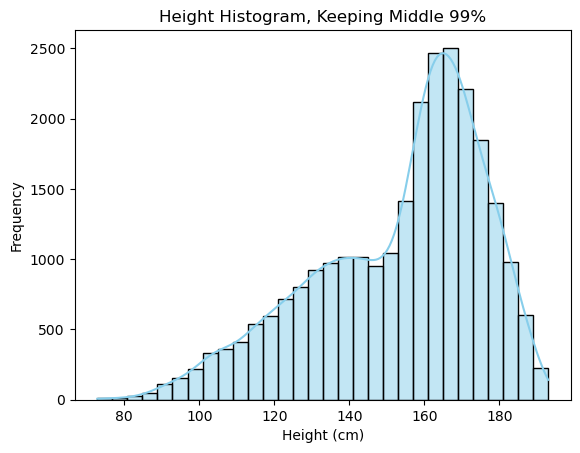

In [71]:
## Height

height_file = "/home/ec2-user/SageMaker/TEAM-5/Data Processing/TN_01/height_AddBirthYear.csv"
height = pd.read_csv(height_file)

print(height.describe())

height['Height_cm15'] = height['Heightcm'].fillna(height['Heightcm_dup15'])
height['Height_cm16'] = height['Height_cm15'].fillna(height['Heightcm_dup16'])
height['Height_cm21'] = height['Height_cm16'].fillna(height['Heightcm_dup21'])
height['Height_cm'] = height['Height_cm21'].fillna(height['Heightcm_dup22'])

del height['Height_cm15']
del height['Height_cm16']
del height['Height_cm21']
del height['Heightcm_dup15']
del height['Heightcm_dup16']
del height['Heightcm_dup21']
del height['Heightcm_dup22']
del height['Heightcm']

height['Height_in15'] = height['Heightin'].fillna(height['Heightin_dup15'])
height['Height_in16'] = height['Height_in15'].fillna(height['Heightin_dup16'])
height['Height_in21'] = height['Height_in16'].fillna(height['Heightin_dup21'])
height['Height_in'] = height['Height_in21'].fillna(height['Heightin_dup22'])

del height['Height_in15']
del height['Height_in16']
del height['Height_in21']
del height['Heightin_dup15']
del height['Heightin_dup16']
del height['Heightin_dup21']
del height['Heightin_dup22']
del height['Heightin']

height['in_to_cm'] = height['Height_in'] * 2.53999863
del height['Height_in']
height['all_heights_cm'] = height['Height_cm'].fillna(height['in_to_cm'])
del height['in_to_cm']
del height['Height_cm']

print("-----------------------------------------------------------")
print(height.describe())
print("-----------------------------------------------------------")
print(height.quantile(0.995, numeric_only=True))
print("-----------------------------------------------------------")
print(height.quantile(0.005, numeric_only=True))
print("-----------------------------------------------------------")

upper_cutoff_height = height['all_heights_cm'].quantile(0.995)
lower_cutoff_height = height['all_heights_cm'].quantile(0.005)

height = height.drop(height[height.all_heights_cm > upper_cutoff_height].index)
height = height.drop(height[height.all_heights_cm < lower_cutoff_height].index)

print(height)

sns.histplot(height['all_heights_cm'], bins=30, kde=True, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Height Histogram, Keeping Middle 99%')
 
# Display the plot
plt.show()

          Unnamed: 0         MaskID  BirthYear_dup21     Weightkg   Weightlbs  \
count   28367.000000   28367.000000       115.000000  6423.000000  882.000000   
mean   345811.453308  596410.581909      1984.260870    49.735718  119.384683   
std     81835.414648  232119.293420        11.824066    28.759510   65.845646   
min       368.000000  200143.000000      1951.000000     0.000000    0.000000   
25%    359423.500000  395836.000000      1981.000000    25.900000   61.600000   
50%    366823.000000  595414.000000      1988.000000    45.000000  114.000000   
75%    374319.500000  796311.000000      1991.000000    67.700000  162.900000   
max    400806.000000  999987.000000      2010.000000   665.000000  631.000000   

       Weightkg_dup15  Weightlbs_dup15  Weightkg_dup16  Weightlbs_dup16  \
count    19471.000000      2296.000000      485.000000        30.000000   
mean        62.463071       139.566004       62.710722       138.747333   
std        423.863819        61.349800       

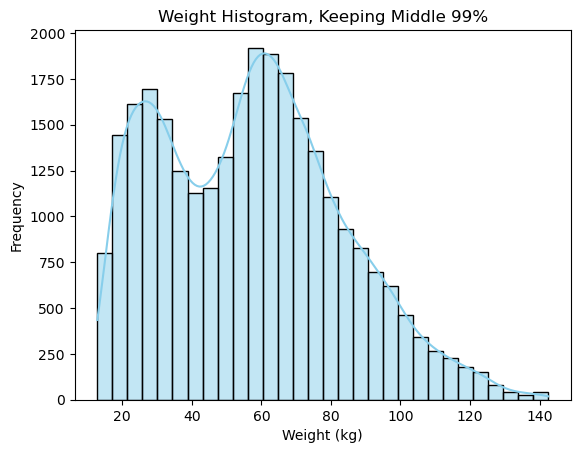

In [66]:
## Weight

weight1_file = "/home/ec2-user/SageMaker/TEAM-5/Data Processing/TN_01/weight_1_AddBirthYear.csv"
weight1 = pd.read_csv(weight1_file)

print(weight1.describe())

weight1['Weight_kg15'] = weight1['Weightkg'].fillna(weight1['Weightkg_dup15'])
weight1['Weight_kg16'] = weight1['Weight_kg15'].fillna(weight1['Weightkg_dup16'])
weight1['Weight_kg21'] = weight1['Weight_kg16'].fillna(weight1['Weightkg_dup21'])
weight1['Weight_kg'] = weight1['Weight_kg21'].fillna(weight1['Weightkg_dup22'])

del weight1['Weight_kg15']
del weight1['Weight_kg16']
del weight1['Weight_kg21']
del weight1['Weightkg_dup15']
del weight1['Weightkg_dup16']
del weight1['Weightkg_dup21']
del weight1['Weightkg_dup22']
del weight1['Weightkg']

weight1['Weight_lbs15'] = weight1['Weightlbs'].fillna(weight1['Weightlbs_dup15'])
weight1['Weight_lbs16'] = weight1['Weight_lbs15'].fillna(weight1['Weightlbs_dup16'])
weight1['Weight_lbs21'] = weight1['Weight_lbs16'].fillna(weight1['Weightlbs_dup21'])
weight1['Weight_lbs'] = weight1['Weight_lbs21'].fillna(weight1['Weightlbs_dup22'])

del weight1['Weight_lbs15']
del weight1['Weight_lbs16']
del weight1['Weight_lbs21']
del weight1['Weightlbs_dup15']
del weight1['Weightlbs_dup16']
del weight1['Weightlbs_dup21']
del weight1['Weightlbs_dup22']
del weight1['Weightlbs']

weight1['lbs_to_kg'] = weight1['Weight_lbs'] * 0.45359237
del weight1['Weight_lbs']
weight1['all_weights_kg'] = weight1['Weight_kg'].fillna(weight1['lbs_to_kg'])
del weight1['lbs_to_kg']
del weight1['Weight_kg']

print(weight1.describe())
print("-----------------------------------------------------------")
print(weight1.quantile(0.995, numeric_only=True))
print("-----------------------------------------------------------")
print(weight1.quantile(0.005, numeric_only=True))

upper_cutoff_weight1 = weight1['all_weights_kg'].quantile(0.995)
lower_cutoff_weight1 = weight1['all_weights_kg'].quantile(0.005)

weight1 = weight1.drop(weight1[weight1.all_weights_kg > upper_cutoff_weight1].index)
weight1 = weight1.drop(weight1[weight1.all_weights_kg < lower_cutoff_weight1].index)

print(weight1)

## Plot histogram

sns.histplot(weight1['all_weights_kg'], bins=30, kde=True, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('Weight Histogram, Keeping Middle 99%')
 
# Display the plot
plt.show()

    Unnamed: 0  MaskID    Visit_Dt  f1availableWeightWeight  \
0          738  332751  11/22/2019                    106.5   
1       341039  289931  08/19/2019                     41.1   
2       342755  367910  01/08/2020                     59.0   
3       344202  435150  12/09/2019                     78.7   
4       345890  511949  10/22/2020                     37.0   
5       346246  528175  06/27/2018                     34.3   
6       347663  592585  04/16/2019                     29.8   
7       352552  817795  11/14/2018                     50.9   
8       353401  857578  10/02/2019                     22.4   
9       357202  243158  04/23/2019                     46.7   
10      357211  272788  01/30/2019                     38.3   
11      357225  333401  10/25/2018                     51.3   
12      357226  334171  02/05/2020                    -10.0   
13      357238  352993  04/01/2019                     66.9   
14      357242  374880  11/28/2018                     

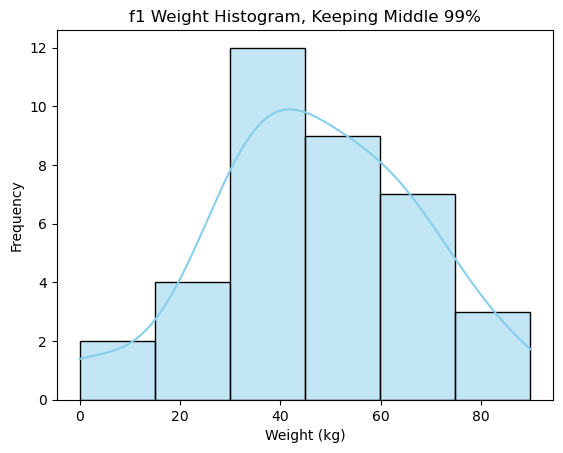

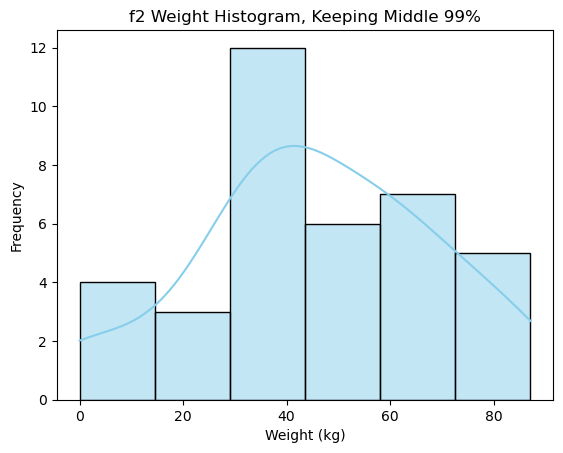

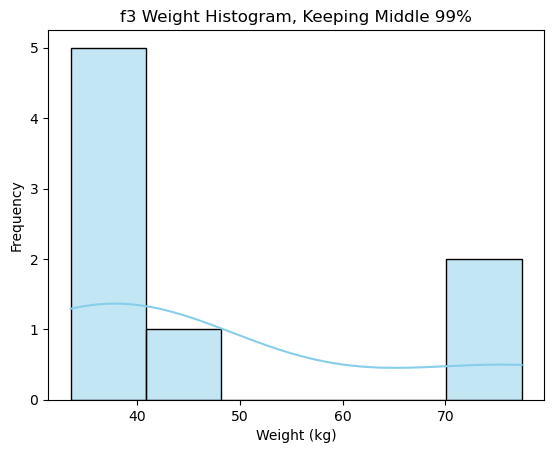

    Unnamed: 0  MaskID    Visit_Dt  f1_weights_kg  f2_weights_kg  \
0          738  332751  11/22/2019            NaN            NaN   
1       341039  289931  08/19/2019      41.100000      42.500000   
2       342755  367910  01/08/2020      59.000000      56.000000   
3       344202  435150  12/09/2019      78.700000      76.500000   
4       345890  511949  10/22/2020      37.000000      40.950000   
5       346246  528175  06/27/2018      34.300000      36.400000   
6       347663  592585  04/16/2019      29.800000      25.900000   
7       352552  817795  11/14/2018      50.900000      67.000000   
8       353401  857578  10/02/2019      22.400000      22.900000   
9       357202  243158  04/23/2019      46.700000      46.700000   
10      357211  272788  01/30/2019      38.300000      37.300000   
11      357225  333401  10/25/2018      51.300000      59.100000   
12      357226  334171  02/05/2020            NaN            NaN   
13      357238  352993  04/01/2019            Na

In [64]:
## Available Weight

weight2_file = "/home/ec2-user/SageMaker/TEAM-5/Data Processing/TN_01/weight_2_availableWeight.csv"
weight2 = pd.read_csv(weight2_file)

print(weight2)

print(weight2.describe())
print("-----------------------------------------------------------")
print(weight2.quantile(0.995, numeric_only=True))
print("-----------------------------------------------------------")
print(weight2.quantile(0.005, numeric_only=True))
## Negative weight in f1availableWeightWeight
## Weight of zero in f1 and f2availableWeightWeight

weight2['f1weight_units'] = weight2['f1availableWeightWeight'].astype(str) + weight2['f1availableWeightUnits'].astype(str)
weight2['f2weight_units'] = weight2['f2availableWeightWeight'].astype(str) + weight2['f2availableWeightUnits'].astype(str)
weight2['f3weight_units'] = weight2['f3availableWeightWeight'].astype(str) + weight2['f3availableWeightUnits'].astype(str)

del weight2['f1availableWeightWeight']
del weight2['f1availableWeightUnits']
del weight2['f2availableWeightWeight']
del weight2['f2availableWeightUnits']
del weight2['f3availableWeightWeight']
del weight2['f3availableWeightUnits']

cond1 = weight2['f1weight_units'].str.contains('Kg')
weight2['f1_weightkg'] = weight2.loc[cond1, 'f1weight_units']
cond2 = weight2['f2weight_units'].str.contains('Kg')
weight2['f2_weightkg'] = weight2.loc[cond2, 'f2weight_units']
cond3 = weight2['f3weight_units'].str.contains('Kg')
weight2['f3_weightkg'] = weight2.loc[cond3, 'f3weight_units']

cond1 = weight2['f1weight_units'].str.contains('lbs')
weight2['f1_weightlbs'] = weight2.loc[cond1, 'f1weight_units']
cond2 = weight2['f2weight_units'].str.contains('lbs')
weight2['f2_weightlbs'] = weight2.loc[cond2, 'f2weight_units']
cond3 = weight2['f3weight_units'].str.contains('lbs')
weight2['f3_weightlbs'] = weight2.loc[cond3, 'f3weight_units']

weight2['f1_weightkg'] = weight2['f1_weightkg'].str[:-2]
weight2['f2_weightkg'] = weight2['f2_weightkg'].str[:-2]
weight2['f3_weightkg'] = weight2['f3_weightkg'].str[:-2]
weight2['f1_weightlbs'] = weight2['f1_weightlbs'].str[:-3]
weight2['f2_weightlbs'] = weight2['f2_weightlbs'].str[:-3]
weight2['f3_weightlbs'] = weight2['f3_weightlbs'].str[:-3]

weight2['f1_weightkg'] = pd.to_numeric(weight2['f1_weightkg'], errors='coerce')
weight2['f2_weightkg'] = pd.to_numeric(weight2['f2_weightkg'], errors='coerce')
weight2['f3_weightkg'] = pd.to_numeric(weight2['f3_weightkg'], errors='coerce')
weight2['f1_weightlbs'] = pd.to_numeric(weight2['f1_weightlbs'], errors='coerce')
weight2['f2_weightlbs'] = pd.to_numeric(weight2['f2_weightlbs'], errors='coerce')
weight2['f3_weightlbs'] = pd.to_numeric(weight2['f3_weightlbs'], errors='coerce')


weight2['f1_lbs_to_kg'] = weight2['f1_weightlbs'] * 0.45359237
weight2['f2_lbs_to_kg'] = weight2['f2_weightlbs'] * 0.45359237
weight2['f3_lbs_to_kg'] = weight2['f3_weightlbs'] * 0.45359237

weight2['f1_weights_kg'] = weight2['f1_weightkg'].fillna(weight2['f1_lbs_to_kg'])
weight2['f2_weights_kg'] = weight2['f2_weightkg'].fillna(weight2['f2_lbs_to_kg'])
weight2['f3_weights_kg'] = weight2['f3_weightkg'].fillna(weight2['f3_lbs_to_kg'])

del weight2['f1_weightkg']
del weight2['f2_weightkg']
del weight2['f3_weightkg']
del weight2['f1_lbs_to_kg']
del weight2['f2_lbs_to_kg']
del weight2['f3_lbs_to_kg']
del weight2['f1weight_units']
del weight2['f2weight_units']
del weight2['f3weight_units']
del weight2['f1_weightlbs']
del weight2['f2_weightlbs']
del weight2['f3_weightlbs']

## Creating cutoffs and dropping data outside the range

upper_cutoff_f1 = weight2['f1_weights_kg'].quantile(0.995)
lower_cutoff_f1 = weight2['f1_weights_kg'].quantile(0.005)

upper_cutoff_f2 = weight2['f2_weights_kg'].quantile(0.995)
lower_cutoff_f2 = weight2['f2_weights_kg'].quantile(0.005)

upper_cutoff_f3 = weight2['f3_weights_kg'].quantile(0.995)
lower_cutoff_f3 = weight2['f3_weights_kg'].quantile(0.005)

weight2 = weight2.drop(weight2[weight2.f1_weights_kg > upper_cutoff_f1].index)
weight2 = weight2.drop(weight2[weight2.f1_weights_kg < lower_cutoff_f1].index)

weight2 = weight2.drop(weight2[weight2.f2_weights_kg > upper_cutoff_f2].index)
weight2 = weight2.drop(weight2[weight2.f2_weights_kg < lower_cutoff_f2].index)

weight2 = weight2.drop(weight2[weight2.f3_weights_kg > upper_cutoff_f3].index)
weight2 = weight2.drop(weight2[weight2.f3_weights_kg < lower_cutoff_f3].index)

## Plotting histograms

sns.histplot(weight2['f1_weights_kg'], bins=6, kde=True, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('f1 Weight Histogram, Keeping Middle 99%')
 
# Display the plot
plt.show()

sns.histplot(weight2['f2_weights_kg'], bins=6, kde=True, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('f2 Weight Histogram, Keeping Middle 99%')
 
# Display the plot
plt.show()

sns.histplot(weight2['f3_weights_kg'], bins=6, kde=True, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('f3 Weight Histogram, Keeping Middle 99%')
 
# Display the plot
plt.show()

print(weight2)